### Statistics Analysis 
The following notebook analyses distibutions of the `p-values`, `t-statistics`, `h-statistics` collected from the articles.

- The biggest problem with gathering data for this part is that there is no uniform pattern in reporting the results. Therefore, data was collected manually.
 
 - Many papers report standard errors instead of `p/t-values` and marks significance with `*`. For the papers where number of observations was given.
     - Therefore, if data allowed standard errors were converted into the p/t-values
 
- Out of 12 **central bank papers** only 11, reported either `p/t-values` or `standard errors` that allowed for conversion.


In [1]:
import pandas as pd
import numpy as np
from read_json import JsonHelpers
import json
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
%matplotlib inline  


# Load json helpers 
jfun = JsonHelpers()

# Get location of the csv files
tstats = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/tstatistics.csv')
pvalues = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/pvalues.csv')

# Stack columns and create column with paper labels
pvalues = pd.DataFrame(pvalues.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
pvalues.columns = ['article', 'pvalue']

# Cleaning pvalues
pvalues['pvalue'] = pvalues['pvalue'].astype(float)
pvalues = pvalues[(pvalues['pvalue'] >=0) & (pvalues['pvalue'] <=1)]


# Stack columns and create column with paper labels
tstats = pd.DataFrame(tstats.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
tstats.columns = ['article', 'tstat']

# Cleaning tstat
tstats['tstat'] = tstats['tstat'].astype(float)
tstats = tstats[(tstats['tstat'] > -30) & (tstats['tstat'] < 30)]

# Get central bank papers' labels
cb_label = jfun.central_bank_paper_label()

In [2]:
# Split t-stats: central bank paper vs remainder
tstats_cb = tstats[tstats['article'].isin(cb_label)].dropna().reset_index(drop=True)
tstats_ncb = tstats[~tstats['article'].isin(cb_label)].dropna().reset_index(drop=True)

# Split p-values: central bank paper vs remainder
pvalues_cb = pvalues[pvalues['article'].isin(cb_label)].dropna().reset_index(drop=True)
pvalues_ncb = pvalues[~pvalues['article'].isin(cb_label)].dropna().reset_index(drop=True)

# Setting up t-stats and p-values df
tstat_df = pd.concat([tstats_ncb['tstat'], tstats_cb['tstat']], axis=1)
tstat_df.columns = ['tstat_not_cb', 'tstat_cb']

pvalue_df = pd.concat([pvalues_ncb['pvalue'], pvalues_cb['pvalue']], axis=1)
pvalue_df.columns = ['pvalue_not_cb', 'pvalue_cb']


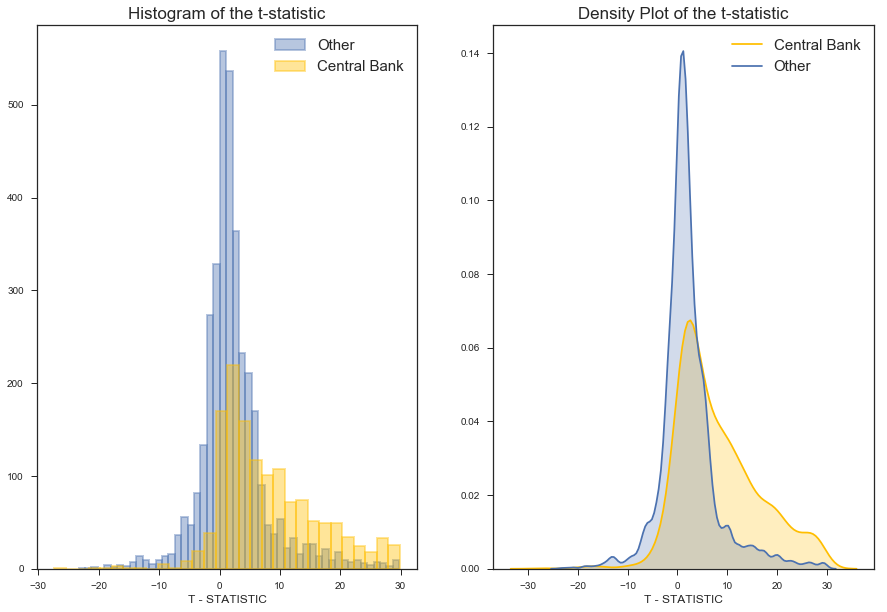

In [5]:
# Plotting t-statistics
# Setting style, size and grid of the plots
sns.set(style="ticks")
plt.figure(figsize=(15,10))

# Plotting histograms
plt.subplot(1, 2, 1)
plt.title('Histogram of the t-statistic', size =17)

# Not Central bank hist
plt.xlabel('t-statistic', size = 15)
sns.distplot(tstat_df['tstat_not_cb'],
             kde=False, label= 'Other',
             color='#4c72b0',
             hist_kws=dict(edgecolor='#4c72b0', linewidth=2))

# Central bank hist
sns.distplot(tstat_df['tstat_cb'].dropna(),
             kde=False, label='Central Bank', color='#ffbe00',
             hist_kws=dict(edgecolor='#ffbe00', linewidth=2))
plt.legend(prop={'size': 15})
plt.xlabel('T - STATISTIC', size = 12)



# Plotting Densities
plt.subplot(1, 2, 2)
plt.title('Density Plot of the t-statistic', size =17)
sns.kdeplot(tstat_df['tstat_cb'].dropna(),  shade=True, label='Central Bank', color='#ffbe00')
sns.kdeplot(tstat_df['tstat_not_cb'], shade=True, label= 'Other', color='#4c72b0')
plt.xlabel('T - STATISTIC', size = 12)
plt.legend(prop={'size': 15})


In [6]:
tstat_df.describe()

,tstat_not_cb,tstat_cb
count,3600.000000,1387.000000
mean,2.243097,8.110981
std,5.760172,8.182991
min,-23.350000,-27.400000
25%,-0.326000,2.142907
50%,1.420000,6.096774
75%,4.055800,13.076923
max,29.790000,29.900000


In [7]:
ks_2samp(np.array(tstat_df['tstat_not_cb']), np.array(tstat_df['tstat_cb']))

Ks_2sampResult(statistic=0.6797222222222222, pvalue=0.0)

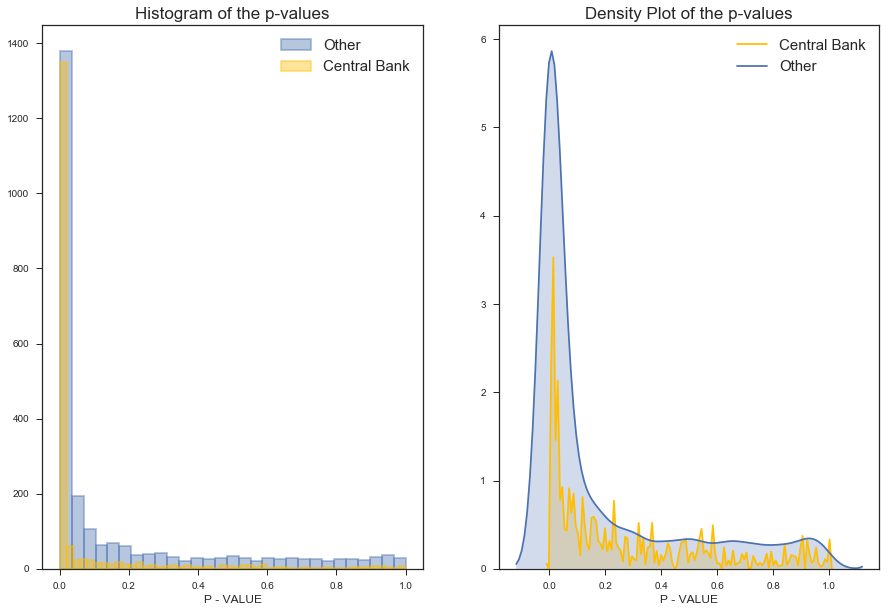

In [3]:
# Plotting p-values
# Setting style, size and grid of the plots
sns.set(style="ticks")
plt.figure(figsize=(15,10))

# Plotting histograms
plt.subplot(1, 2, 1)
plt.title('Histogram of the p-values', size =17)

# Not Central bank hist
plt.xlabel('P - VALUE', size = 15)
sns.distplot(pvalue_df['pvalue_not_cb'],
             kde=False, label= 'Other',
             color='#4c72b0',
             hist_kws=dict(edgecolor='#4c72b0', linewidth=2))

# Central bank hist
sns.distplot(pvalue_df['pvalue_cb'].dropna(),
             kde=False, label='Central Bank', color='#ffbe00',
             hist_kws=dict(edgecolor='#ffbe00', linewidth=2))
plt.legend(prop={'size': 15})
plt.xlabel('P - VALUE', size = 12)



# Plotting Densities
plt.subplot(1, 2, 2)
plt.title('Density Plot of the p-values', size =17)
sns.kdeplot(pvalue_df['pvalue_cb'].dropna(),  shade=True, label='Central Bank', color='#ffbe00')
sns.kdeplot(pvalue_df['pvalue_not_cb'], shade=True, label= 'Other', color='#4c72b0')
plt.xlabel('P - VALUE', size = 12)
plt.legend(prop={'size': 15})



In [9]:
pvalue_df.describe()

,pvalue_not_cb,pvalue_cb
count,2.539000e+03,1.796000e+03
mean,1.752069e-01,8.102032e-02
std,2.777301e-01,1.993768e-01
min,0.000000e+00,0.000000e+00
25%,9.856980e-12,0.000000e+00
50%,2.000000e-02,1.599819e-16
75%,2.395569e-01,1.784219e-02
max,1.000000e+00,1.000000e+00


In [10]:
ks_2samp(np.array(pvalue_df['pvalue_not_cb']), np.array(pvalue_df['pvalue_cb']))

Ks_2sampResult(statistic=0.2926348956282001, pvalue=1.6589092827796286e-95)

In [11]:
# Downloading and adjusting hstatistic
hstat = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/hstatistics.csv')
hstat = pd.DataFrame(hstat.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
hstat.columns = ['article', 'hstatistic']

hstat['hstatistic'] = hstat['hstatistic'].astype(float)

# Excluding p001 paper by Bikker
#hstat = hstat[hstat['article'] != 'p001']

hstat = hstat[(hstat['hstatistic'] >= -2) & (hstat['hstatistic'] <= 1.5)]
hstat_ncb = hstat[~hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)
hstat_cb = hstat[hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)

hstat_cb = hstat[hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)
hstat_ncb = hstat[~hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)

hstat_df = pd.concat([hstat_ncb['hstatistic'], hstat_cb['hstatistic']], axis=1)
hstat_df.columns = ['hstat_not_cb', 'hstat_cb']


hstat_df = pd.concat([hstat_cb['hstatistic'], hstat_ncb['hstatistic']], axis=1)
hstat_df.columns = ['hstat_cb', 'hstat_not_cb']

In [12]:
hstat_df['hstat_not_cb'] = pd.to_numeric(hstat_df['hstat_not_cb'], errors='coerce')
hstat_df = hstat_df.dropna(subset=['hstat_not_cb'])

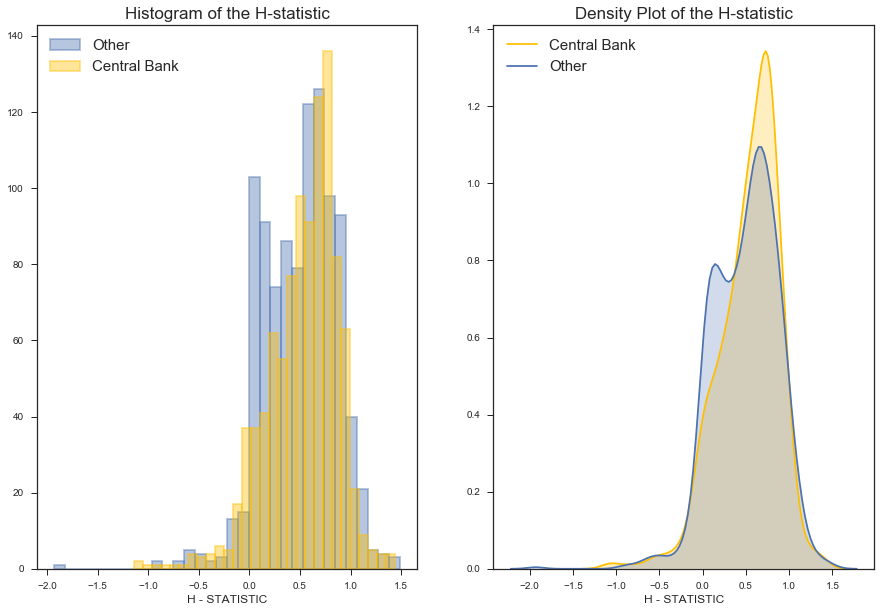

In [13]:
# Setting style, size and grid of the plots
sns.set(style="ticks")
plt.figure(figsize=(15,10))

# Plotting histograms
plt.subplot(1, 2, 1)
plt.title('Histogram of the H-statistic', size =17)

# Not Central bank hist
plt.xlabel('h-statistic', size = 15)
sns.distplot(hstat_df['hstat_not_cb'],
             kde=False, label= 'Other',
             color='#4c72b0',
             hist_kws=dict(edgecolor='#4c72b0', linewidth=2))

# Central bank hist
sns.distplot(hstat_df['hstat_cb'].dropna(),
             kde=False, label='Central Bank', color='#ffbe00',
             hist_kws=dict(edgecolor='#ffbe00', linewidth=2))
plt.legend(prop={'size': 15})
plt.xlabel('H - STATISTIC', size = 12)



# Plotting Densities
plt.subplot(1, 2, 2)
plt.title('Density Plot of the H-statistic', size =17)
sns.kdeplot(hstat_df['hstat_cb'].dropna(),  shade=True, label='Central Bank', color='#ffbe00')
sns.kdeplot(hstat_df['hstat_not_cb'], shade=True, label= 'Other', color='#4c72b0')
plt.xlabel('H - STATISTIC', size = 12)
plt.legend(prop={'size': 15})


In [14]:
hstat_df['hstat_cb'].describe()

count    992.000000
mean       0.535468
std        0.349704
min       -1.136000
25%        0.330000
50%        0.600000
75%        0.778250
max        1.442600
Name: hstat_cb, dtype: float64

In [15]:
# Sig different from 0.5, yes
(0.528 - 0.5)/(0.36/(1366**(1/2)))

2.8746228952896535

In [16]:
hstat_df['hstat_not_cb'].describe()

count    992.000000
mean       0.495337
std        0.363116
min       -1.927600
25%        0.220000
50%        0.540000
75%        0.760000
max        1.490000
Name: hstat_not_cb, dtype: float64

In [17]:
# Sig different from 0.5, no
(0.492 - 0.5)/(0.366/(1036**(1/2)))

-0.7035399754942555

In [18]:
# are means the same?, nope
s = (((1366-1)*(0.366**2) + (1036-1)*(0.36**2))/(1034+1366))**(1/2)
t = ((0.528-0.492)/(s*((1/1036) + (1/1366))**(1/2)))
t

2.4044007112782957

In [19]:
ks_2samp(np.array(hstat_df['hstat_not_cb']), np.array(hstat_df['hstat_cb']))

Ks_2sampResult(statistic=0.08770161290322581, pvalue=0.0008913786011205206)

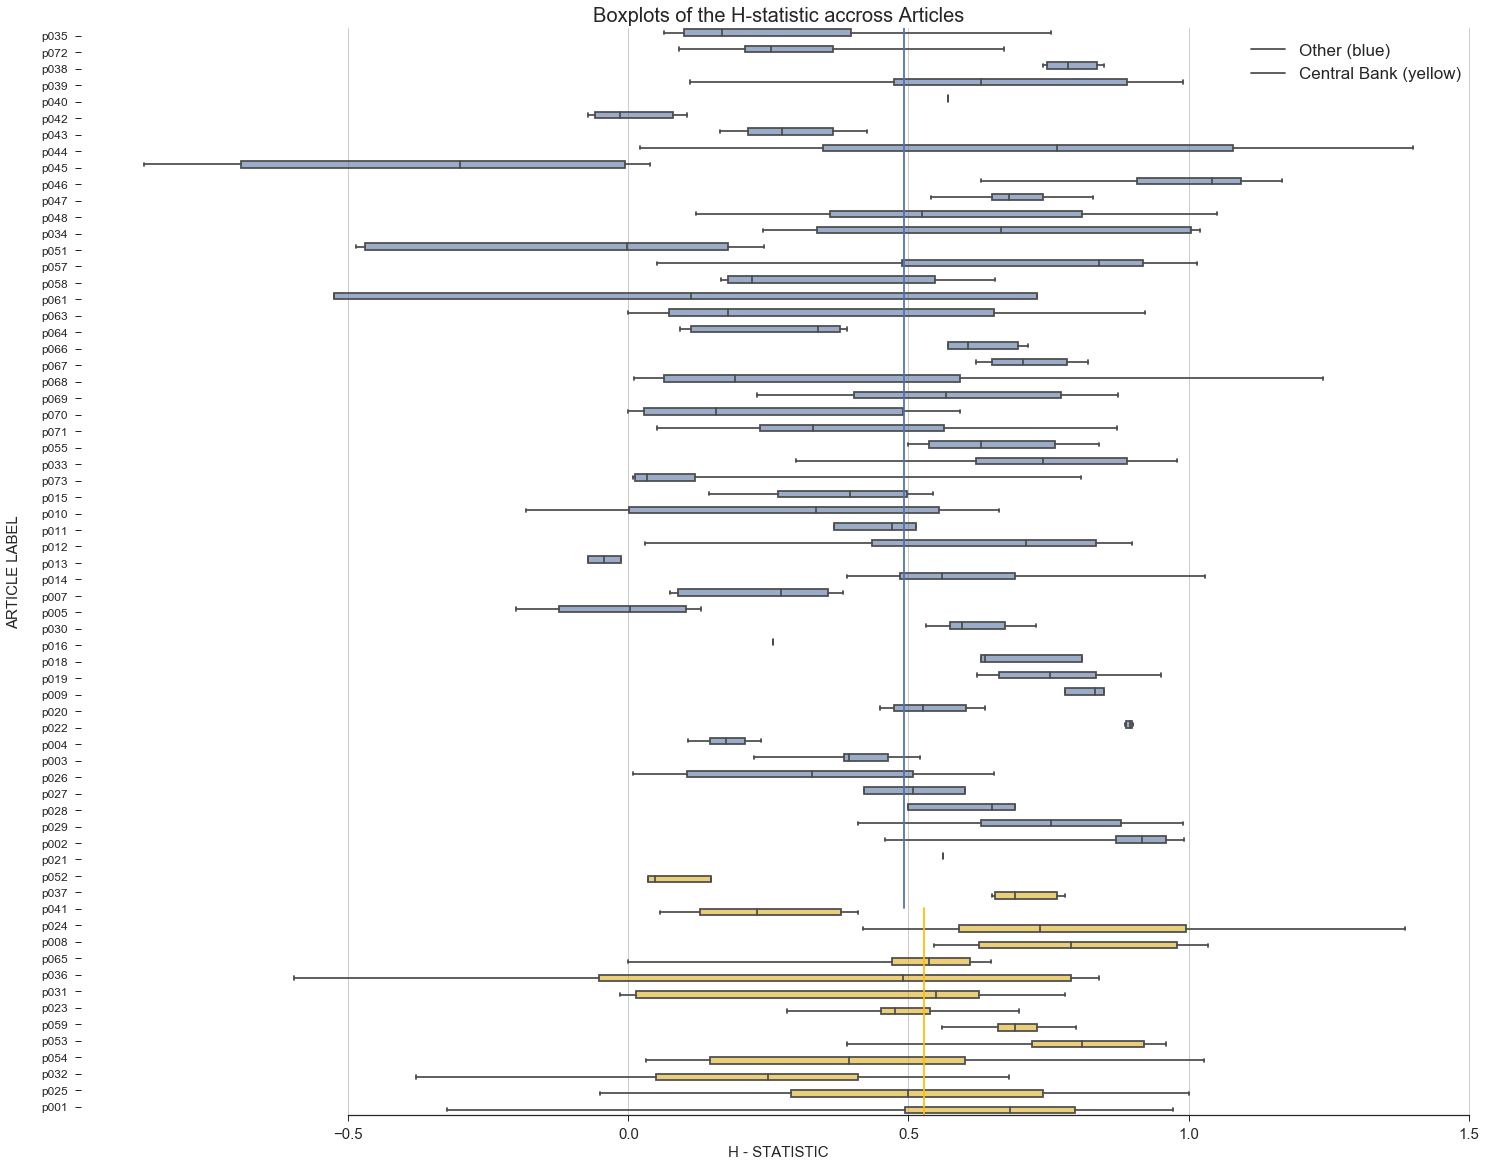

In [20]:
sns.set(style="ticks")
hstat['central_bank'] = hstat['article'].isin(cb_label)*1
order = hstat.groupby('article').sum().sort_values('central_bank').reset_index()['article']

# Initialize the figure
f, ax = plt.subplots(figsize=(25, 20))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="hstatistic", y="article", data=hstat, sym='',
            whis=[5, 95], hue='central_bank', order = order, palette = ('#4c72b0', '#ffbe00'))

plt.axvline(x=0.492415, ymin=0.19, ymax=1, color='#4c72b0', zorder=2)
plt.axvline(x=0.527666, ymin=0, ymax=0.19, color='#ffbe00', zorder=2)



# Add transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .6))


# Tweak the visual presentation
plt.title('Boxplots of the H-statistic accross Articles', size =20)
plt.xlabel('H - STATISTIC', size=15)
plt.ylabel('ARTICLE LABEL', size = 15, ma = 'center', labelpad=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=12)

ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.legend(loc='best', labels = ['Other (blue)', 'Central Bank (yellow)'], prop={'size': 17})

